In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = sns.load_dataset("iris")
df["class"] = df.species.apply(lambda x: 1 if x=='setosa' else 0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
X = df[df.columns[:3]].values
y = df["class"].values

In [4]:
def minmax_scale(X):
    N, d = X.shape
    for col in range(d):
        col_min, col_max = X[:, col].min(), X[:, col].max()
        X[:, col] = (X[:, col] - col_min) / (col_max - col_min)
    return X

In [5]:
X_scaled = minmax_scale(X)

In [6]:
class logmodel:
    def __init__(self, step_size=20, n_iter=3000):
        self.step_size = step_size
        self.n_iter = n_iter
        self.loss_list = []
        self.weights = []
        
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def __gradient(self, X,y,w):
        N, d = X.shape
        # Initialize grad as 1xd array.
        grad=np.zeros((1,d))
        for i in range(N):
            grad=grad+(self.__sigmoid(np.dot(X[i,:],np.transpose(w)))-y[i])*X[i,:]
        grad=np.dot(1/N,grad)
        return grad
    
    def logisticRegression_func(self,X,y):
        """
        K: no. of iteration
        """
        N, d = X.shape
        # Initialize w as 1xd array.
        w = np.zeros((1,d))
        loss = float('inf')
        loss_list = []
        for i in range(self.n_iter):
            grad=self.__gradient(X,y,w)
            w = w-self.step_size * grad
            l = self.__sigmoid(np.dot(X,np.transpose(w)))
            loss = -np.dot(np.squeeze(np.asarray(y)),np.log(l))-np.dot(1-np.squeeze(np.asarray(y)),np.log(1-l))
            loss_list.append(loss/N)
        self.loss_list.append(loss_list)
        
        return w
    
    def fit(self,X,y):
        self.label_names = np.unique(y)
        classes = np.unique(y)
        if len(classes) == 2:
            y_prime = np.array([1 if label == classes[0] else 0 for label in y])
            w = self.logisticRegression_func(X,y_prime)
            self.weights.append(w)
        else:
            for k in classes:
                y_prime = np.array([1 if label == k else 0 for label in y])
                w = self.logisticRegression_func(X,y_prime)
                self.weights.append(w)
            
    def predict(self, X, show_prob=False):
        k = len(np.unique(self.label_names)) # no. of classes
        N, d = X.shape # 55, 3
        
        y_predict = np.zeros((N,k))
        for i, w in enumerate(self.weights):
            y_predict[:, i] = self.__sigmoid(np.dot(X,np.transpose(w))).flatten()
        
        if show_prob:
            return y_predict
        else:
            return np.apply_along_axis(np.argmax, 1, y_predict)

In [7]:
lm = logmodel(n_iter=5000)
lm.fit(X_scaled,y)
weights = lm.weights
weights

[array([[  9.57014967, -26.62573728,  25.97709358]])]

In [8]:
loss_list = np.array(lm.loss_list[:])

In [9]:
loss_list.shape

(1, 5000, 1)

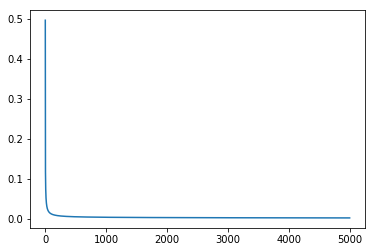

In [13]:
plt.plot(loss_list[0].flatten())